In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [16]:
df.isna().sum()

Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [10]:
df = df.drop("User ID", axis = "columns")

In [13]:
df.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [17]:
df["Gender"].value_counts()

Female    516
Male      484
Name: Gender, dtype: int64

In [18]:
df["Purchased"].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

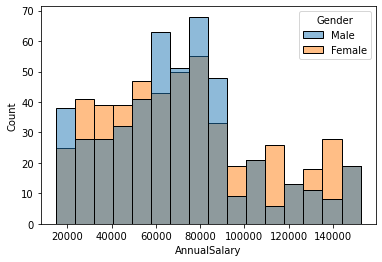

In [19]:
sns.histplot(x = "AnnualSalary", data =df, hue = "Gender")

In [20]:
#the female earn more than the males

<AxesSubplot:xlabel='Age', ylabel='Count'>

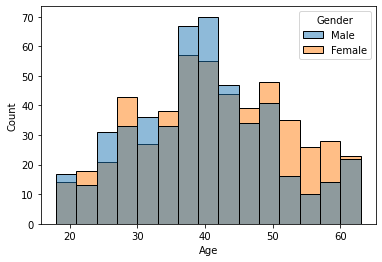

In [21]:
sns.histplot(x = "Age", data =df, hue = "Gender")

In [22]:
#female buyers are older in general

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

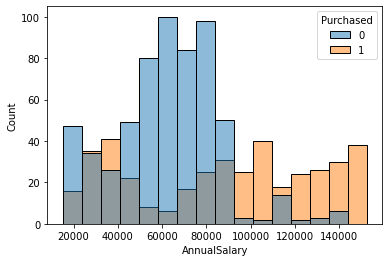

In [23]:
sns.histplot(x = "AnnualSalary", data =df, hue = "Purchased")

In [24]:
#those who earn more buy cars

<AxesSubplot:xlabel='Age', ylabel='Count'>

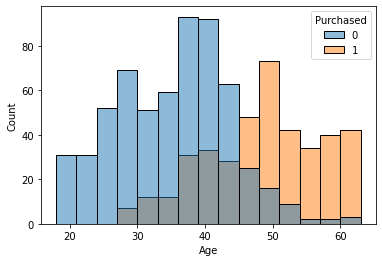

In [25]:
sns.histplot(x = "Age", data =df, hue = "Purchased")

In [26]:
#older people buy cars

In [29]:
df.corr().Purchased.sort_values()

AnnualSalary    0.364974
Age             0.616036
Purchased       1.000000
Name: Purchased, dtype: float64

In [30]:
#Age is more correlated to purchases made.

# feature Engineering

In [31]:
#Dummy variable for gender column

In [32]:
df = pd.get_dummies(df, drop_first=False)

In [34]:
df.head()

,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,35,20000,0,0,1
1,40,43500,0,0,1
2,49,74000,0,0,1
3,40,107500,1,0,1
4,25,79000,0,0,1


In [35]:
df = df.drop("Gender_Male", axis = 1)

In [36]:
df.head()

,Age,AnnualSalary,Purchased,Gender_Female
0,35,20000,0,0
1,40,43500,0,0
2,49,74000,0,0
3,40,107500,1,0
4,25,79000,0,0


In [37]:
X = df[["AnnualSalary","Age","Gender_Female"]]

In [38]:
y= df.Purchased

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.3)

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.fit_transform(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [44]:
def modelperformance(predictions):
    print("Accuracy score in model is {}".format(accuracy_score(y_test,predictions)))

In [45]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train,y_train.values.ravel())
log_predictions = log_model.predict(scaled_X_test)
modelperformance(log_predictions)

Accuracy score in model is 0.83


In [46]:
from sklearn.neighbors import KNeighborsClassifier
test_errors = []
for k in range (1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train.values.ravel())
    knn_pred = knn_model.predict(scaled_X_test)
    test_error_rate = 1 - accuracy_score(y_test,knn_pred)
    test_errors.append(test_error_rate)

In [47]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'K Neighbours')

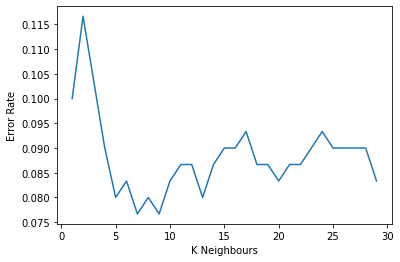

In [48]:
plt.plot(range(1,30), test_errors)
plt.ylabel("Error Rate")
plt.xlabel("K Neighbours")

In [49]:
#the best performance is between 5 and 10

In [52]:
knn_elbowmethod = KNeighborsClassifier(n_neighbors=9)
knn_elbowmethod.fit(scaled_X_train,y_train.values.ravel())
knn_pred = knn_model.predict(scaled_X_test)
modelperformance(knn_pred)

Accuracy score in model is 0.9166666666666666


In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps = [('knn',knn)])
param_grid={'knn__n_neighbors': k_values}
cv_classifier = GridSearchCV(pipe,param_grid,cv = 5, scoring = "accuracy")

In [62]:
cv_classifier.fit(scaled_X_train,y_train.values.ravel())
print(cv_classifier.best_params_)

{'knn__n_neighbors': 17}


In [63]:
pred_gridknn = cv_classifier.predict(scaled_X_test)
modelperformance(pred_gridknn)

Accuracy score in model is 0.9066666666666666


In [64]:
#Trying other algorithms

In [66]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svr = {"C":[0.01,0.1,0.5,1],"kernel":['linear','rbf','poly']}
gridsvr = GridSearchCV(svm,param_grid_svr)

In [67]:
gridsvr.fit(scaled_X_train,y_train.values.ravel())
pred_svr = gridsvr.predict(scaled_X_test)
modelperformance(pred_svr)

Accuracy score in model is 0.9166666666666666


In [68]:
#Using decision tree classifier

In [69]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(scaled_X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [70]:
treepred = treemodel.predict(scaled_X_test)
modelperformance(treepred)

Accuracy score in model is 0.8533333333333334


In [71]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [32,64,128,256]
max_features = [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]
param_grid_rfr = {'n_estimators': n_estimators, 'max_features':max_features, 'bootstrap':bootstrap,'oob_score':oob_score}
gridrfr = GridSearchCV(rfr_model,param_grid_rfr)
gridrfr.fit(scaled_X_train,y_train.values.ravel())

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\onata\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\onata\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256],
                         'oob_score': [True, False]})

In [72]:
print(gridrfr.best_params_)

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256, 'oob_score': True}


In [76]:
rfc = RandomForestClassifier(max_features= 2, n_estimators= 256, oob_score= True)

In [77]:
rfc.fit(scaled_X_train,y_train.values.ravel())
predsrfc = rfc.predict(scaled_X_test)
modelperformance(predsrfc)

Accuracy score in model is 0.8933333333333333
